## read results 

In [611]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [612]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.visualization.pygame.animate_hockey_game import read_and_merge_dataframes

## Helper function(s)

In [613]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


## Read!

In [614]:
root_dir = "/Users/luisd/luis-simulation/speed1"

model_df = read_and_merge_dataframes(root_dir, prefix_fname="model", verbose=True)
agents_df = read_and_merge_dataframes(root_dir, prefix_fname="agents", verbose=True)

From '/Users/luisd/luis-simulation/speed1' I read ['/Users/luisd/luis-simulation/speed1/model_1.pd', '/Users/luisd/luis-simulation/speed1/model_2.pd', '/Users/luisd/luis-simulation/speed1/model_3.pd']
From '/Users/luisd/luis-simulation/speed1' I read ['/Users/luisd/luis-simulation/speed1/agents_1.pd', '/Users/luisd/luis-simulation/speed1/agents_2.pd', '/Users/luisd/luis-simulation/speed1/agents_3.pd']


In [615]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'goals', 'puck_is_taken', 'shots', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'topuck_x', 'topuck_y', 'angle2puck', 'last_action', 'have_puck', 'can_see_puck', 'can_reach_puck']


In [616]:
# half-ice rink
model_df = model_df.sort_values(by=('timestamp'))
model_df.index = np.arange(model_df.shape[0])
# agents
agents_df = agents_df.sort_values(by=('timestamp'))
agents_df.index = np.arange(agents_df.shape[0])

In [617]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)
seconds_between_events

0.050000000000000003

In [618]:
# max_tick = model_df["Unnamed: 0"].max()

In [619]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 30000.15 seconds of simulation, ~500 minutes


## Agents

In [620]:
agents_df

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.05,99.000000,84.000000,-0.007625,-0.006470,0.01,-99.000000,-84.000000,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,0,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.05,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.10,98.038125,83.032349,0.762509,0.646977,1.00,-98.038125,-83.032349,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
3,1,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.10,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.15,97.999971,83.000034,-0.763091,-0.646291,1.00,-97.874971,-82.875034,"Angle in radians = 6.283 (Pi/2: 1.571, Pi:3.14...",Align with puck,False,True,False
5,2,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.15,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.20,97.961816,82.967720,-0.763091,-0.646291,1.00,-97.836816,-82.842720,"Angle in radians = 6.283 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
7,3,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.20,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.25,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.25,97.923658,82.935409,-0.763164,-0.646205,1.00,-97.798658,-82.810409,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...",Align with puck,False,True,False


In [621]:
# agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]

[last action = 'Move => speed = 1.00 feet/sec, direction = Angle in radians = 2.322 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), so I am going Vec2d(-0.68235257084625, 0.7310232342815876)'] puck in (0.12, 0.12), agent in (48.40, 45.30), moving towards (-0.6824, 0.7310)


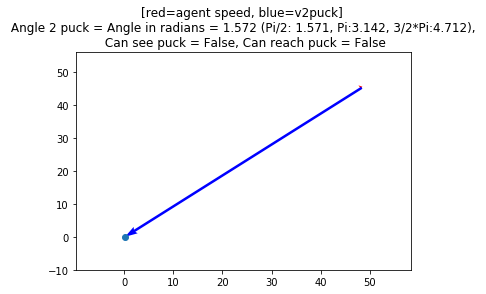

In [622]:
# For the `can_see_puck` case, debug with root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves5", ag_idx = 24
ag_idx = 3382
x = agents_df.loc[ag_idx]["pos_x"] # [agents_df["timestamp"] == 0.65]
y = agents_df.loc[ag_idx]["pos_y"]
sp_x = agents_df.loc[ag_idx]["speed_x"]
sp_y = agents_df.loc[ag_idx]["speed_y"]
topuck_x = agents_df.loc[ag_idx]["topuck_x"]
topuck_y = agents_df.loc[ag_idx]["topuck_y"]
angletopuck = agents_df.loc[ag_idx]["angle2puck"]
lastaction = agents_df.loc[ag_idx]["last_action"]
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([x, x], [y, y], [sp_x, topuck_x], [sp_y, topuck_y], angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])
puck_x = agents_df.loc[ag_idx - 1]["pos_x"]
puck_y = agents_df.loc[ag_idx - 1]["pos_y"]
plt.plot([(puck_x)], [(puck_y)],'o')
# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
print("[last action = '%s'] puck in (%.2f, %.2f), agent in (%.2f, %.2f), moving towards (%.4f, %.4f)" % (lastaction, puck_x, puck_y, x, y, sp_x, sp_y))
min_x = min([x, x - sp_x, puck_x]) - 10
max_x = max([x, x + sp_x, puck_x]) + 10
min_y = min([y, y - sp_y, puck_y]) - 10
max_y = max([y, y + sp_y, puck_y]) + 10
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
can_see_puck = agents_df.loc[ag_idx]["can_see_puck"]
can_reach_puck = agents_df.loc[ag_idx]["can_reach_puck"]
plt.title("[red=agent speed, blue=v2puck] \n Angle 2 puck = %s, \n Can see puck = %s, Can reach puck = %s" % (angletopuck, can_see_puck, can_reach_puck))
plt.show()

In [623]:
agents_df[["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y",  "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,can_see_puck,can_reach_puck
0,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.05,99.000000,84.000000,-0.007625,-0.006470,True,False
1,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.05,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.10,98.038125,83.032349,0.762509,0.646977,False,False
3,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.10,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.15,97.999971,83.000034,-0.763091,-0.646291,True,False
5,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.15,0.125000,0.125000,0.000000,0.000000,NaN,NaN
6,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.20,97.961816,82.967720,-0.763091,-0.646291,True,False
7,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.20,0.125000,0.125000,0.000000,0.000000,NaN,NaN
8,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,0.25,0.125000,0.125000,0.000000,0.000000,NaN,NaN
9,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.25,97.923658,82.935409,-0.763164,-0.646205,True,False


## Puck movement

### Is it moving at all?

In [624]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

Text(0.5,0,'Step')

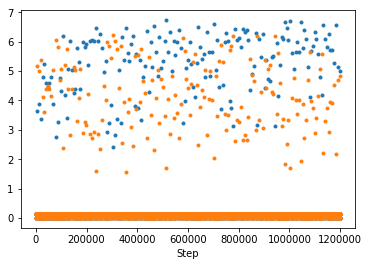

In [644]:
# all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')
puck_x, = plt.plot(all_puck_movs['pos_x'], '.')
puck_y, = plt.plot(all_puck_movs['pos_y'], '.')
plt.xlabel("Step")
# plt.xlim([71775, 72270])

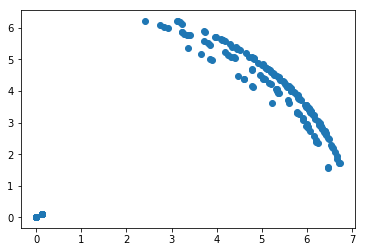

In [626]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

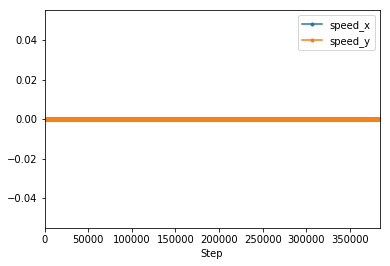

In [627]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [628]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]
all_players_actions = all_players_actions.sort_values(by=('timestamp'))
all_players_actions.index = np.arange(all_players_actions.shape[0])

In [629]:
# all_players_actions[
#             all_players_actions.timestamp.between(left=74, right=75)]

In [630]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [631]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [632]:
# # df_succ_grabs = all_players_actions[
# #     all_players_actions['last_action'].str.contains("Grab", na=False) & 
# #     (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
# # ]
# df_succ_grabs = agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]
df_succ_grabs = agents_df[
    agents_df['have_puck'] == True
]
num_episodes = len(df_succ_grabs)
print("The agent played %d episodes" % (num_episodes))


The agent played 170 episodes


In [633]:
df_succ_grabs.index[:10]

Int64Index([6598, 13802, 20060, 26655, 33687, 40141, 46838, 53814, 60834,
            68058],
           dtype='int64')

In [634]:
# all_players_actions.iloc[2755:2763]
agents_df.iloc[7002:7010][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
7002,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,175.10,91.858627,81.170146,-0.749800,-0.661665,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
7003,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,175.10,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7004,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,175.15,91.808725,81.173262,-0.998056,0.062321,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
7005,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,175.15,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7006,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,175.20,91.771263,81.140146,-0.749226,-0.662314,Align with puck,False,True,False
7007,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,175.20,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7008,puck_0f7bea64-1b51-4c42-a30e-288c24c22aed,175.25,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7009,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,175.25,91.721358,81.143219,-0.998110,0.061456,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


2400


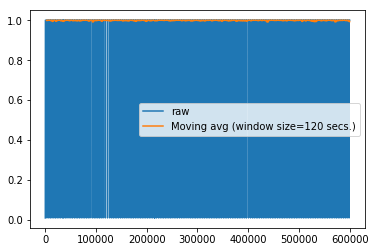

In [635]:
speeds = all_players_actions["speed_magnitude"].tolist()
raw, = plt.plot(speeds, '-', label="raw")
window_size_in_secs = 120
window_size = int(round(window_size_in_secs / seconds_between_events))
print(window_size)

r_mean = running_mean(speeds, N = window_size)
rm, = plt.plot(range(window_size - 1, len(speeds)), r_mean, label='Moving avg (window size=%d secs.)' % (window_size_in_secs))
plt.legend(handles=[raw, rm])
# plt.xlim([2.5e6, 2.5e6 + 3000])

In [636]:
print(len(all_players_actions.index))
print(len(all_players_actions.index.unique()))

600003
600003


In [637]:
all_players_actions.index[0:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [638]:
all_players_actions.index.max()

600002

In [639]:
all_players_actions[:3]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.05,99.000000,84.000000,-0.007625,-0.006470,0.01,-99.000000,-84.000000,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,1,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.10,98.038125,83.032349,0.762509,0.646977,1.00,-98.038125,-83.032349,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
2,2,forward_8274e7da-bd15-4fcc-887c-fecbe64ffdb9,0.15,97.999971,83.000034,-0.763091,-0.646291,1.00,-97.874971,-82.875034,"Angle in radians = 6.283 (Pi/2: 1.571, Pi:3.14...",Align with puck,False,True,False


Text(0.5,1,'Number of seconds between grabs')

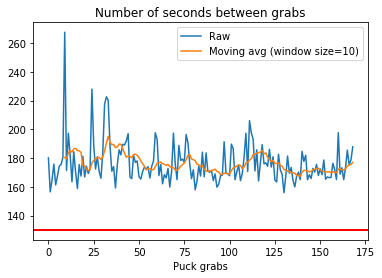

In [640]:
timestamps_grabs = agents_df.iloc[df_succ_grabs.index]["timestamp"].tolist()
seconds_between = [(time2 - time1) for time1, time2 in zip(timestamps_grabs, timestamps_grabs[1:])]
seconds_between_plot, = plt.plot(seconds_between, label='Raw')
window_size = 10
r_mean = running_mean(seconds_between, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(seconds_between)), r_mean, label='Moving avg (window size=%d)' % (window_size))
# max_theoretical, = plt.axhline(y=9,linewidth=4, color='r', label='max secs (thoretical)')
# for experiment with ONLY 10 ft/sec, 13 secs is the optimal
speed_of_agent = 1
num_min_secs = 130/speed_of_agent
plt.axhline(y=num_min_secs,linewidth=2, color='r', label='max secs (thoretical)')
# plt.axhline(y=num_min_secs * 1.5,linewidth=2, color='r', label='max secs (thoretical)')
plt.legend(handles=[seconds_between_plot, moving_avg_plot])


plt.xlabel("Puck grabs")
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
plt.title("Number of seconds between grabs")
# display_how_many_episodes = 100
# print("Zooming in to last %d episodes" % (display_how_many_episodes))
# plt.xlim([num_episodes - display_how_many_episodes, num_episodes])
# plt.ylim([0, :])


In [646]:
import math
bucket_in_minutes = 15
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

500 minutes, so there are 34 buckets of 15' long each


Text(0.5,1,"Number of 'grab's (per 15 minutes)")

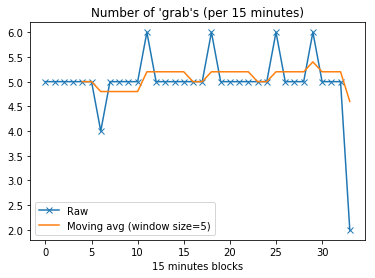

In [647]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
events_with_puck_plot, = plt.plot(events_with_puck, 'x-', label="Raw")
window_size = 5
r_mean = running_mean(events_with_puck, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(events_with_puck)), r_mean, label='Moving avg (window size=%d)' % (window_size))
plt.legend(handles=[events_with_puck_plot, moving_avg_plot])

plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
# plt.xlim([len(events_with_puck) - 100, len(events_with_puck)])
# print("Only plotting from block %d to %d" % (len(events_with_puck) - 100, len(events_with_puck)))

In [648]:
# import pickle
# from hockey.behaviour.core.action import HockeyAction
# from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState

# brain_file = "/Users/luisd/luis-simulation/models/brainfetchpuck_minmoves2.bin"
# model = pickle.load(open(brain_file, 'rb'))
# print("%d rules read." % (len(model)))
# best_fitness_rule_and_fitness = (None, -10)
# for rule in model:
# #     if rule.fitness > .5:
# #         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#     if  rule.action == HockeyAction.GRAB_PUCK:
#         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#         if best_fitness_rule_and_fitness[1] < rule.fitness:
#             best_fitness_rule_and_fitness = (rule, rule.fitness)
# best_rule = best_fitness_rule_and_fitness[0]
# print("Best rule for 'GRAB_PUCK' is ")
# print(best_rule.condition, '=>', best_rule.action, ' [%.5f, experience: %d]' % (best_rule.fitness, best_rule.experience))
# print(BitstringEnvironmentState.explain_condition(condition=best_fitness_rule_and_fitness[0].condition))

# SCRATCH PAPER DOWN HERE

In [ ]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'A':np.random.random(20),'B':np.random.random(20)})


In [ ]:
df


In [ ]:
df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()

In [ ]:
plt.plot()

In [ ]:
import plotly
plotly.__version__

In [ ]:
# import plotly.plotly as py
# from plotly.figure_factory import create_quiver
    
# import math
    
# # 1 Arrow from (0,0) to (1,1)
# fig = create_quiver(x=[10], y=[-1], u=[1], v=[1], scale=1)    
# py.iplot(fig, filename='quiver')
# fig2 = create_quiver(x=[0], y=[1], u=[1], v=[1], scale=1)    
# py.iplot(fig2, filename='quiver')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]])
# X, Y, U, V = zip(*soa)
# plt.figure()
# ax = plt.gca()
# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
# ax.set_xlim([-1, 10])
# ax.set_ylim([-1, 10])
# plt.draw()

# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
# plt.show()


In [ ]:
# # plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
# plt.quiver([0], [0], [1], [1], angles='xy', scale_units='xy', scale=1)
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
# plt.show()

## Display matrix as heatmap


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axis = plt.subplots()
a = np.random.random((100, 100)) # ((16, 16))
heatmap = axis.pcolor(a, cmap=plt.cm.cool) # Blues)
# plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()

In [656]:
import pickle
import time
import os
import random
from pathlib import Path
from typing import Callable, Optional

from hockey.core.player.base import Player
from hockey.core.evaluator import Evaluator
from hockey.core.evaluator import matrix_for_aligning
from hockey.core.evaluator import matrix_for_looking_at_left
from hockey.core.evaluator import matrix_for_looking_at_right
from hockey.core.evaluator import matrix_for_looking_back
from hockey.core.half_rink import HockeyHalfRink
from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState
from hockey.behaviour.core.hockey_scenario import GrabThePuckProblem

import numpy as np
from geometry.point import Point
from geometry.vector import Vec2d, X_UNIT_VECTOR
from hockey.behaviour.core.action import HockeyAction

# *********************************************


hockeyworld = HockeyHalfRink(how_many_defense=0, how_many_offense=1,
                             # following parameters don't matter
                             one_step_in_seconds=1, collect_data_every_secs=1, record_this_many_minutes=1)
basic_fwd_problem = GrabThePuckProblem(hockeyworld)
total_actions = len(basic_fwd_problem.get_possible_actions())
episodes = [1, 10, 100, 200]
brain_root_dir = "/Users/luisd/luis-simulation/models/speed1/"
print("total_actions = %d" % (total_actions))
print("Starting matrix generation (looking fwd)...")
dict_looking_at = {}
for episode in episodes:
    brain_file_name = os.path.join(brain_root_dir, "brain_episode_%d.bin" % (episode))
    (r_matrix_looking_fwd, bitstring_m1) = matrix_for_aligning(
        p=hockeyworld.attack[0], 
        brain_file_name = brain_file_name, 
        compare_with=None,
        total_actions=total_actions)
    dict_looking_at[episode] = (brain_file_name, r_matrix_looking_fwd)
# # random.seed(333)
# (r_matrix_looking_fwd2, bitstring_m2) = matrix_for_aligning(
#     p=hockeyworld.attack[0], 
#     brain_file_name = brain_file_name, 
#     compare_with=(r_matrix_looking_fwd, bitstring_m1),
#     total_actions=total_actions)
# print("Starting matrix generation (looking LEFT)...")
# r_matrix_looking_left,_ = matrix_for_looking_at_left(
#     p=hockeyworld.attack[0], 
#     brain_file_name = brain_file_name,
#     total_actions=total_actions)
# print("DONE matrix generation")
# print("Starting matrix generation (looking BACK)...")
# r_matrix_looking_back,_ = matrix_for_looking_back(
#     p=hockeyworld.attack[0], 
#     brain_file_name = brain_file_name,
#     total_actions=total_actions)
print("DONE matrix generation")


Half-ice rink reset
ALIGN_WITH_PUCK
TURN_HARD_LEFT
TURN_HARD_RIGHT
SKATE_MIN_SPEED
Half-ice rink reset
[scenario reset] ice world = [puck] taken = False, pos = (0.00, 0.00), speed = Vec2d(0, 0), KINETIC_FRICTION_COEF = 0.07
Goals scored: 0; shots = 0
Defensive squad:

Offensive squad:
height = 6.92 feet, reach = 6.87 feet
position: (99.00, 84.00)
speed: Vec2d(-0.007625091353727917, -0.00646977448195096) (norm = 0.01 feet/sec)
Have puck = False

reward_shot = 33.33
reward_get_puck = 3.33
punishment_action_failed = -0.50
punishment_loss_energy = -1.00
total_actions = 4
Starting matrix generation (looking fwd)...
Loading model from file '/Users/luisd/luis-simulation/models/speed1/brain_episode_181.bin' (last modified on Fri Nov 24 14:56:46 2017)...
+++++++++++++++++++++++ self.model.algorithm.exploration_probability = 0.00
sweeping height 0 out of 85
sweeping height 10 out of 85
sweeping height 20 out of 85
sweeping height 30 out of 85
sweeping height 40 out of 85
sweeping height 50 out o

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axis = plt.subplots()
# a = np.random.random((100, 100)) # ((16, 16))
heatmap = axis.pcolor(r_matrix_looking_fwd, cmap=plt.cm.afmhot, vmin=0, vmax=1) # brg, cool or Blues)
# plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar(heatmap)
problem_descr = "puck static at (0,0); player starts at upper right-corner"
plt.title("Problem: %s\nEpisode: %d, Source: \n'%s'" % (problem_descr, episode, brain_file_name))
plt.show()

NameError: name 'brain_root_dir' is not defined

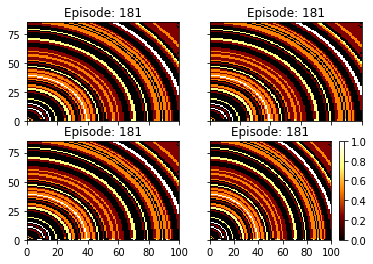

In [673]:
import matplotlib.pyplot as plt
import numpy as np

fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
for i, axis in enumerate(axn.flat):
    heatmap = axis.pcolor(r_matrix_looking_fwd, cmap=plt.cm.afmhot, vmin=0, vmax=1) # brg, cool or Blues)
    # axis.set_title("Episode: %d, Source: \n'%s'" % (episode, brain_file_name))
    axis.set_title("Episode: %d" % (episode))
plt.colorbar(heatmap)
problem_descr = "puck static at (0,0); player starts at upper right-corner\n Root dir for brain: %s" % (brain_root_dir)
# plt.title("Episode: %d, Source: \n'%s'" % (episode, brain_file_name))
plt.suptitle(problem_descr)
plt.show()

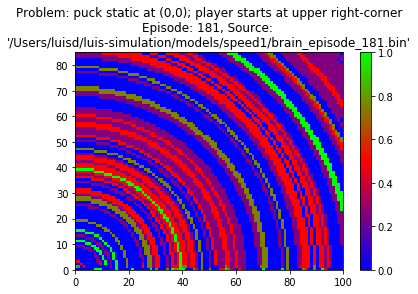

In [658]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(episode, brain_file_name, matrix_with_values):
    fig, axis = plt.subplots()
    # a = np.random.random((100, 100)) # ((16, 16))
    heatmap = axis.pcolor(matrix_with_values, cmap=plt.cm.brg) # cool or Blues)
    # plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.colorbar(heatmap)
    problem_descr = "puck static at (0,0); player starts at upper right-corner"
    plt.title("Problem: %s\nEpisode: %d, Source: \n'%s'" % (problem_descr, episode, brain_file_name))
    plt.show()
for the_episode, file_and_matrix in dict_looking_at.items():
    brain_file_name, r_matrix_looking_fwd = file_and_matrix
    plot_matrix(episode, brain_file_name, r_matrix_looking_fwd)

In [ ]:
r_matrix_looking_fwd[0,64]

In [ ]:
r_matrix_looking_fwd2[0,64]

In [ ]:
np.where(r_matrix_looking_left != r_matrix_looking_left2)


In [ ]:
def look_at_puck(p: Player):
    p.speed = X_UNIT_VECTOR
    p.align_with_puck()

def do_to_player(ice_rink: HockeyHalfRink, pre_sense_fn) -> Player:
    p1 = hockeyworld.attack[0]
    p1.model.space.place_agent(p1, pos=Point(3, 6))
    pre_sense_fn(p1)
    return p1

hockeyworld = HockeyHalfRink(how_many_defense=0, how_many_offense=1,
                             # following parameters don't matter
                             one_step_in_seconds=1, collect_data_every_secs=1, record_this_many_minutes=1)
p1 = do_to_player(hockeyworld, look_at_puck)
hockeyworld2 = HockeyHalfRink(how_many_defense=0, how_many_offense=1,
                             # following parameters don't matter
                             one_step_in_seconds=1, collect_data_every_secs=1, record_this_many_minutes=1)
p2 = do_to_player(hockeyworld2, look_at_puck)



In [ ]:
situation_sensed1 = BitstringEnvironmentState(full_state=p1.sense()).as_bitstring()
situation_sensed2 = BitstringEnvironmentState(full_state=p2.sense()).as_bitstring()

In [ ]:
situation_sensed1

In [ ]:
situation_sensed2

In [ ]:
situation_sensed1 == situation_sensed2

In [ ]:
p1 == p2

In [ ]:
# quick demo
def look_at_puck(p: Player):
    p.speed = X_UNIT_VECTOR
    p.align_with_puck()
#     assert p.on_top_of_puck() or 
#     (p.vector_looking_at() == p.model.vector_to_puck(p.pos).normalized()), 
#     "p.vector_looking_at() =%s, p.model.vector_to_puck(p.pos).normalized() = %s" % (p.vector_looking_at(), p.model.vector_to_puck(p.pos).normalized())

hockeyworld = HockeyHalfRink(how_many_defense=0, how_many_offense=1,
                             # following parameters don't matter
                             one_step_in_seconds=1, collect_data_every_secs=1, record_this_many_minutes=1)
print("+++++++++++++++ Puck position: %s" % (hockeyworld.puck.pos))
evaluator = Evaluator(player=hockeyworld.attack[0], load_from_full_file_name=brain_file_name)
m1 = evaluator.evaluation_matrix(pre_sense_fn=look_at_puck,
                                       optimal_action=HockeyAction.SKATE_MIN_SPEED)
hockeyworld2 = HockeyHalfRink(how_many_defense=0, how_many_offense=1,
                             # following parameters don't matter
                             one_step_in_seconds=1, collect_data_every_secs=1, record_this_many_minutes=1)
print("+++++++++++++++ Puck position: %s" % (hockeyworld2.puck.pos))
evaluator = Evaluator(player=hockeyworld.attack[0], load_from_full_file_name=brain_file_name)
m2 = evaluator.evaluation_matrix(pre_sense_fn=look_at_puck,
                                       optimal_action=HockeyAction.SKATE_MIN_SPEED)
m3 = evaluator.evaluation_matrix(pre_sense_fn=look_at_puck,
                                       optimal_action=HockeyAction.SKATE_MIN_SPEED)


In [ ]:
np.all(m2 == m3)

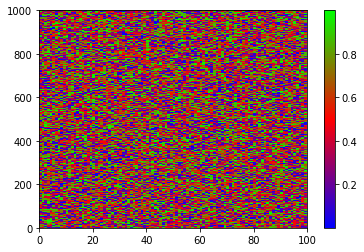

In [676]:
import matplotlib.pyplot as plt
import numpy as np

fig, axis = plt.subplots()
a = np.random.random((1000, 100)) # ((16, 16))
heatmap = axis.pcolor(a, cmap=plt.cm.brg) # cool or Blues)
# heatmap = axis.pcolor(r_matrix_looking_left, cmap=plt.cm.brg) # cool or Blues)
# plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()

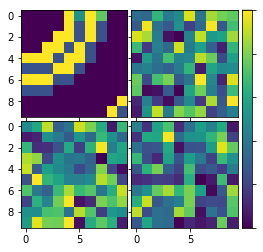

In [651]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

# Some random data
values1 = r_matrix_looking_left # np.random.rand(10,10)
values2 = np.random.rand(10,10)
values3 = np.random.rand(10,10)
values4 = np.random.rand(10,10)
vals = [values1,values2,values3,values4]

fig = plt.figure()

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 2),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

for val, ax in zip(vals,grid):
    im = ax.imshow(val, vmin=0, vmax=1)

grid.cbar_axes[0].colorbar(im)

for cax in grid.cbar_axes:
    cax.toggle_label(False)

plt.show()